# PERCEPTRON

## Simple implementation of a perceptron in numpy


we create  Perceptron class with weights and bias random initialized

the perceptron performs a matrix multiplication between inputs and weights and add the bis.\

### y = wx + b

the result is passed to an activation function that return True if the value is greater than 0.

the predict performs a batch computation (many inputs at a time)
the fit function takes 1 input at a time 

In [442]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.metrics import confusion_matrix,classification_report

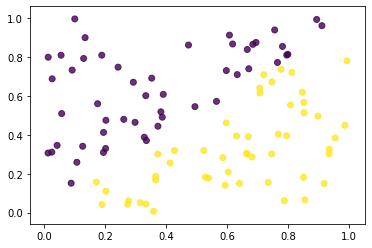

In [446]:
#create a matrix of random numbers between -1 and 1
inputs = np.random.random((100,2))

#for simplicity let's create labels so that if x > y then 1 else 0
labels = np.array([1 if x >=y else 0 for x, y in inputs])

plt.scatter([i[0] for i in inputs], [i[1] for i in inputs], c = labels, alpha=0.8)

In [454]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size,  epochs=50):
        self.weights = np.zeros(input_size)
        self.bias = np.zeros(1)
        self.epochs = epochs
        self.lr = 0.01
        
    
    def activation_fn(self, x):
        return x >= 0
 
    def predict(self, x):
        s = np.dot(x, self.weights)+ self.bias
        a = self.activation_fn(s)
        return a
 
    def fit(self, X, y):
        a = time.time()
        errors = []
        for _ in range(self.epochs):
            total_error = 0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                e = label - prediction
                total_error += np.abs(e)
                self.weights +=  e * inputs * self.lr
                self.bias +=  e * self.lr
            errors.append(total_error) 
        plt.plot(errors)
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        print ('Elapsed time', time.time() - a)


Elapsed time 0.14002370834350586


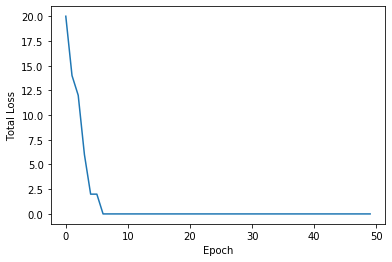

In [455]:
p = Perceptron(inputs.shape[1])
p.fit(inputs, labels)



In [456]:
print (classification_report(labels, p.predict(inputs)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## This perceptron perform a fit of all inputs at the same time

In [460]:
class Perceptron2(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, epochs=50):
        self.weights = np.zeros(input_size)
        self.bias = np.zeros(1)
        self.epochs = epochs
        self.lr = 0.01
    
    def activation_fn(self, x):
        return x >= 0
 
    def predict(self, x):
        s = np.dot(x, self.weights)+ self.bias
        a = self.activation_fn(s)
        return a
 
    def fit(self, X, y):
        a = time.time()
        errors = []
        for _ in range(self.epochs):
            e = y - self.predict(X)
            self.weights += np.sum(X * e[:, None], axis=0) * self.lr
            self.bias += np.sum(e)  * self.lr
            errors.append(e.mean())
        plt.plot(errors)
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        print ('Elapsed time', time.time() - a)
       


Elapsed time 0.01712965965270996


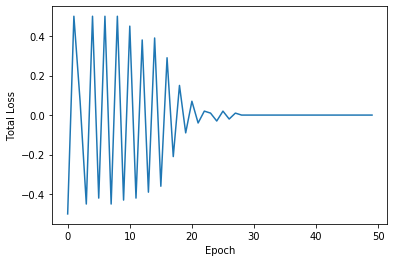

In [461]:
p2 = Perceptron2(inputs.shape[1])
p2.fit(inputs, labels)

In [462]:
print (classification_report(labels, p2.predict(inputs)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

